# MNIST dataset handwritten numbers classification

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras import models, layers, utils
import matplotlib.pyplot as plt

### Data loading and exploration

In [3]:
# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print('train_images shape: {0}. train_labels shape: {1}'.format(train_images.shape, train_labels.shape))
print('test_images shape: {0}. test_labels shape: {1}'.format(test_images.shape, test_labels.shape))

train_images shape: (60000, 28, 28). train_labels shape: (60000,)
test_images shape: (10000, 28, 28). test_labels shape: (10000,)


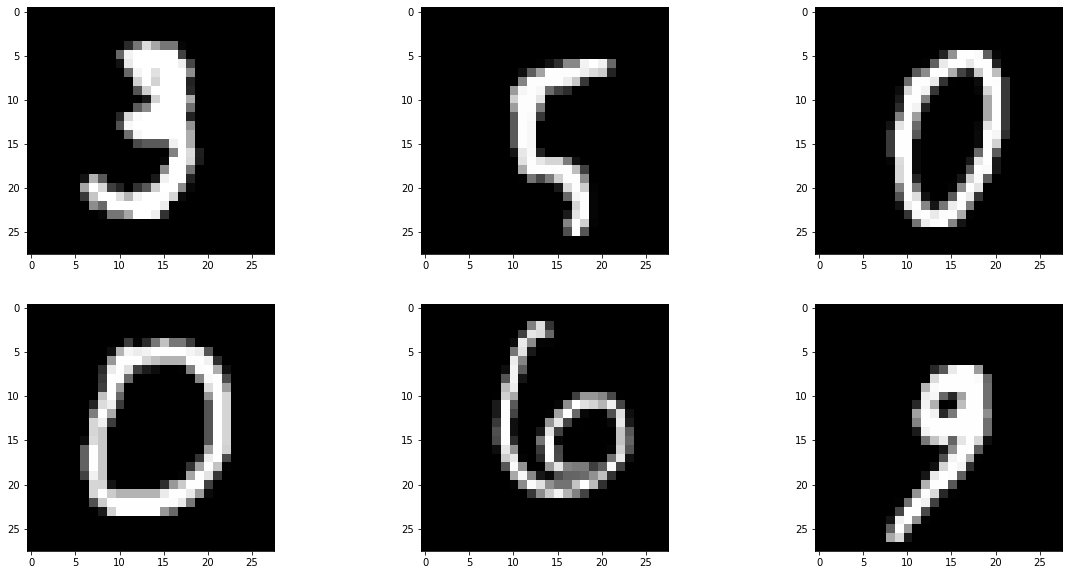

In [5]:
fig = plt.figure(figsize=(20,10))

# Train images
ax1 = fig.add_subplot(231)
digit1 = train_images[10]
ax1.imshow(digit1, cmap='gray')

ax2 = fig.add_subplot(232)
digit2 = train_images[100]
ax2.imshow(digit2, cmap='gray')

ax3 = fig.add_subplot(233)
digit3 = train_images[1000]
ax3.imshow(digit3, cmap='gray')

# Test images
ax4 = fig.add_subplot(234)
digit4 = test_images[10]
ax4.imshow(digit4, cmap='gray')

ax5 = fig.add_subplot(235)
digit5 = test_images[100]
ax5.imshow(digit5, cmap='gray')

ax6 = fig.add_subplot(236)
digit6 = test_images[1000]
ax6.imshow(digit6, cmap='gray')

plt.show()

## Data preprocessing

In [6]:
# Preprocessing the image data
train_images = train_images.reshape((train_images.shape[0], 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((test_images.shape[0], 28 * 28))
test_images = test_images.astype('float32') / 255

In [7]:
# Preprocessing the labels
train_labels = utils.to_categorical(train_labels)
test_labels = utils.to_categorical(test_labels)

## Neural network

In [8]:
# Network architecture
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

#Compile the model
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
# Train network
history = network.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
60000/60000 [==============================] - 5s 86us/sample - loss: 0.2558 - acc: 0.9260
Epoch 2/10
60000/60000 [==============================] - 4s 61us/sample - loss: 0.1021 - acc: 0.9698
Epoch 3/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0669 - acc: 0.9794
Epoch 4/10
60000/60000 [==============================] - 3s 48us/sample - loss: 0.0483 - acc: 0.9853
Epoch 5/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0371 - acc: 0.9887
Epoch 6/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0281 - acc: 0.9916
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0210 - acc: 0.9938
Epoch 8/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0169 - acc: 0.9953
Epoch 9/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0128 - acc: 0.9962
Epoch 10/10
60000/60000 [==============================] - 3s 44us/sample - loss: 

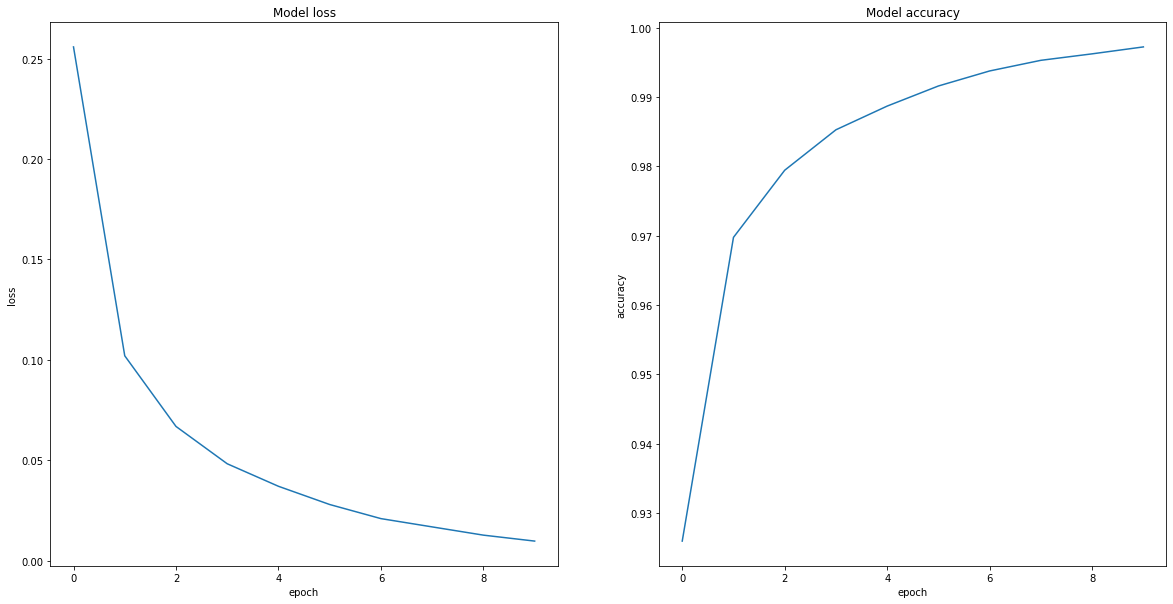

In [10]:
# Plot train loss and accuracy
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(121)
ax1.plot(history.history['loss'])
ax1.title.set_text('Model loss')
ax1.set_ylabel('loss')
ax1.set_xlabel('epoch')

ax2 = fig.add_subplot(122)
ax2.plot(history.history['acc'])
ax2.title.set_text('Model accuracy')
ax2.set_ylabel('accuracy')
ax2.set_xlabel('epoch')

plt.show()

In [11]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 0s 29us/sample - loss: 0.0729 - acc: 0.9800
0.07291047970470936 0.98
